In [87]:
###### valido para Julia 1.7.2
using LinearAlgebra
using Plots
using Graphs #paquetería para graphos
using Random
using GraphPlot #paqueteria para graficar redes
using SparseArrays
using LaTeXStrings

In [88]:
fnt = Plots.font("sans-serif", 15) # Para gráficar loas labels


Plots.Font("sans-serif", 15, :hcenter, :vcenter, 0.0, RGB{N0f8}(0.0,0.0,0.0))

In [89]:
F(theta,i,j,k)=exp(im*theta*i*j/k) #son las entradas de la matriz, las exponenciales

function Coin_Fourier(k,theta=2*pi)   #genera la matriz
    Cki=zeros(Complex,k,k)
    ### Este es un parche para un anillo##
    C=zeros(2,2)
    C[1,1]=0
    C[1,2]=1
    C[2,1]=1
    C[2,2]=0
    ######################################
    
    Cki[1,:].=1                # se le agrega 1's a la primera fila
    Cki[:,1].=1                # se le agrega 1's a la primera columna
    for i=1:k-1                #  En este for se va a recorrer cada fila y columna
        for j=1:k-1               ## junto con este otro for
            Cki[j+1,i+1]=F(theta,i,j,k) # se utiliza la función F que se definio arriba
        end
    end
   return (1/sqrt(k))*(Cki*C)  # se le multiplica por el 1/sqrt(grado) al que corresponde 
end


## Neceisto algo que si le doy un nodo me diga que base se le asigna###
function Base_del_Nodo(Nodo,A)
    k=sum(A[Nodo,:]) # Sumamos cada entrada eso nos dará el grado del nodo
    Id=Matrix(1I, k, k) # generamos la matriz identidad que corresponde al grado
    return Id #La retorna
              ## Esto genera la base segun sea el grado de cada nodo
end

Base_del_Nodo (generic function with 1 method)

In [90]:
function U_evolution(n,A,ψ)

    ### Para ver que vectores hay hay que recorrer cada uno... PARA UNA MATRIZ ψ DADA
    for t=1:n
        for i=1:size(A)[1]   #PAra un nodo i me va a dar el vector que le corresponde Ö

            if rowvals(ψ[i,:])==[]       # si no hay ningún peso entonces continua
               continue 
            else
               #println(ψ[i,:]) 
            end

            Nodos_de_i=rowvals(A[i,:])   # nodos de i
            Basis=Base_del_Nodo(i,A)     # base del nodo i


            v=zeros(length(Nodos_de_i)) # el vector del nodo i
            for (index,value) in enumerate(Nodos_de_i)   # hacemos dos indices uno que enlista los elemntos y otro los nodos conectados al nodos 1
            v+=Basis[:,index]*ψ[i,value]
            end


            #Al vector le aplicamos el operador moenda
            k=sum(A[i,:])  # calculamos
            v=Coin_Fourier(k)*v  ## El vector despues de la moenda de Fourier 


            ## Hay que reemplazar los pesos (SEGUIMOS EN EL NODO 1)
            for (index,value) in enumerate(Nodos_de_i)   # hacemos dos indices uno que enlista los elemntos y otro los nodos conectados al nodos 1
                ψ[i,value]=v[index]
            end
        end
        ### operador S### es solo el trasnpuesto de la matriz ψ
        ψ=sparse(transpose(ψ))
    end
    return ψ
end

U_evolution (generic function with 1 method)

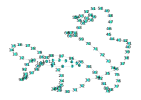

In [91]:
#Red de prueba
NODOS=101
g = SimpleGraph(NODOS)  #defeinimos nodos de 1 al 3

for i=1:NODOS-1
   add_edge!(g,i,i+1)  
end
add_edge!(g,NODOS,1)

gplot(g, nodelabel=1:NODOS)   #graficamos la red

In [92]:
A=adjacency_matrix(g)

101×101 SparseMatrixCSC{Int64, Int64} with 202 stored entries:
⠪⡦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈
⠀⠈⠪⡦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠺⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠺⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠺⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠺⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠫⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠫⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠫⡢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠫⣢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⣢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⣢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⣢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⣢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⡦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⡦⡀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⡦⡀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠪⡦⡀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠺⡢⡀⠀
⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠺⡢

In [93]:
sum(A[4,:])

2

In [94]:
size(A)[1]

101

In [95]:
Int64((NODOS-1)/2 +1)

51

In [96]:
A[52,:]

101-element SparseVector{Int64, Int64} with 2 stored entries:
  [51 ]  =  1
  [53 ]  =  1

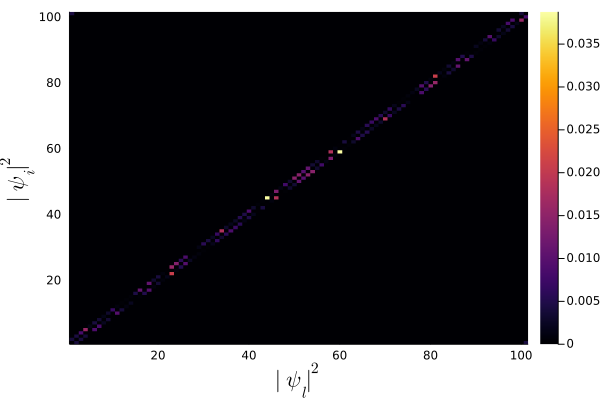

In [115]:

## matriz psi
# ψ=sparse(zeros(Complex,size(A)))

# ψ[1,2]=1/sqrt(2)
# ψ[1,4]=1/sqrt(2)
ψ=sparse(zeros(Complex,size(A)))

# Norm=1/sqrt(sum(A))
# for i=1:size(A)[1]
#     ψ[i,:]=A[i,:]*Norm
# end

ψ[52,51]=1/sqrt(2) * 1
ψ[52,53]=1/sqrt(2) * 1*im

# Norm=1/sqrt(sum(A[1,:]))
# ψ[1,:]=A[1,:]*Norm


B=U_evolution(1000,A,ψ)
BB=abs2.(Matrix(B))
#BB[20,1]=0.05
plot(heatmap(BB),guidefont=fnt,xlabel=L"|\psi_l|^2",ylabel=L"|\psi_i|^2")

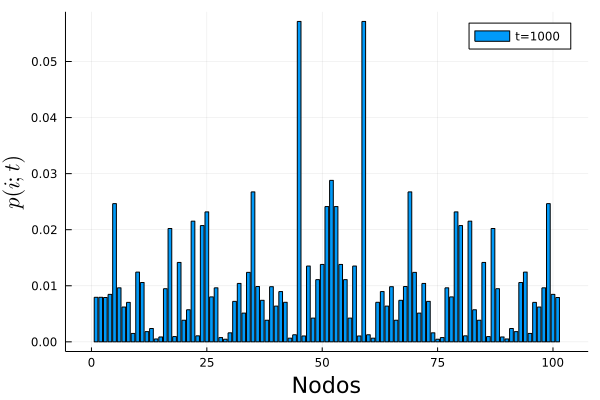

In [116]:
JJ=30
pesos=zeros(size(A)[1])
for i=1:length(pesos)
    pesos[i]=sum(BB[i,:])
end
bar(pesos,guidefont=fnt,ylabel=L"p(i;t)",xlabel="Nodos",label="t=1000")

┌ Info: Saved animation to 
│   fn = C:\Users\sebas\Desktop\Maestria\QW\Target_initial.gif
└ @ Plots C:\Users\sebas\.julia\packages\Plots\CoJwR\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\sebas\\Desktop\\Maestria\\QW\\Target_initial.gif")
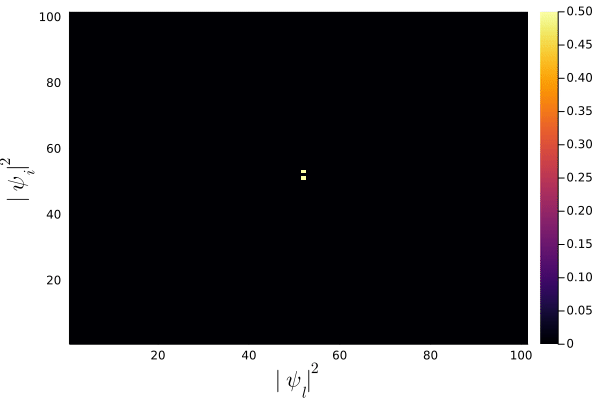

In [99]:

anim= @animate for l=1:1:500
    B=U_evolution(l,A,ψ)
    BB=abs2.(Matrix(B))
    #BB[20,1]=0.05
    plot(heatmap(BB),guidefont=fnt,xlabel=L"|\psi_l|^2",ylabel=L"|\psi_i|^2",label="t=$l")
end
gif(anim,"./Target_initial.gif", fps=30)


┌ Info: Saved animation to 
│   fn = C:\Users\sebas\Desktop\Maestria\QW\Target_weihgt.gif
└ @ Plots C:\Users\sebas\.julia\packages\Plots\CoJwR\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\sebas\\Desktop\\Maestria\\QW\\Target_weihgt.gif")
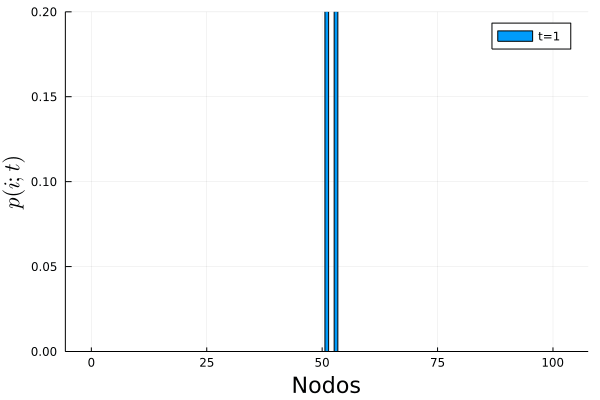

In [100]:

anim= @animate for l=1:1:500
    B=U_evolution(l,A,ψ)
    BB=abs2.(Matrix(B))
    pesos=zeros(size(A)[1])
    for i=1:length(pesos)
        pesos[i]=sum(BB[i,:])
    end
    bar(pesos,guidefont=fnt,ylabel=L"p(i;t)",xlabel="Nodos",label="t=$l",ylim=(0,0.2))
end
gif(anim,"./Target_weihgt.gif", fps=30)


# Entropia

In [101]:
ψ=sparse(zeros(Complex,size(A)))

# Norm=1/sqrt(sum(A))
# for i=1:size(A)[1]
#     ψ[i,:]=A[i,:]*Norm
# end

ψ[52,51]=1/sqrt(2) * 1
ψ[52,53]=1/sqrt(2) * 1*im

0.0 + 0.7071067811865475im

In [102]:
function Reduc_M_Density(ψ,A)   # Se calcula la matriz de densidad reducidna
    ρs=zeros(Complex,size(A));  # SE hace una matriz del tamano de la de la adyacencia
    for m=1:size(A)[1]          # se secoge un nodo
        index=rowvals(ψ[m,:])   # solo hace el corrimiento en los nodos disponibles
        for i in index          # llos renglones
            for j in index      # las columnas
                ρs[i,j]+=ψ[m,i]*conj(ψ[m,j])   # se hace la multiplicacion 
            end
        end
    end
    return ρs
end

Reduc_M_Density (generic function with 1 method)

In [103]:
B=U_evolution(1,A,ψ)
Dst=Reduc_M_Density(B,A); #
tr(Dst)

In [104]:
lamb=eigvals(Dst); ###Eigenvalores
S=0                 ##Aqui se coloca la entropia
for i=1:length(lamb)   # se suman de los eigenvalores 
    if lamb[i]<=0
        continue
    end
    S+=-(lamb[i]*log(lamb[i])) 
end
S

4.440892098500625e-16

In [105]:
function Entropia(t,A,ψ) # Calculo de la entropia
    B=U_evolution(t,A,ψ) # los coeficientes o pesos
    Dst=Reduc_M_Density(B,A) #MAtriz de denisdad reducida
    lamb=eigvals(Dst); ###Eigenvalores
    S=0                 ##Aqui se coloca la entropia
    for i=1:length(lamb)   # se suman de los eigenvalores 
            if lamb[i]<=0
                continue
            end
        S+=-(lamb[i]*log(lamb[i])) 
    end
    return S 
end

Entropia (generic function with 1 method)

In [ ]:
ψ=sparse(zeros(Complex,size(A)))

# Norm=1/sqrt(sum(A))
# for i=1:size(A)[1]
#     ψ[i,:]=A[i,:]*Norm
# end

ψ[52,51]=1/sqrt(2) * 1
ψ[52,53]=1/sqrt(2) * 1*im

T=1000

S=zeros(T)

for i=1:T
    S[i]=Entropia(i,A,ψ)
end

In [ ]:
plot(S,ylabel=L"S_N/k_B",xlabel=L"t[steps]",
        guidefont=fnt,label=false)#,xlims=(100,150))
